<a href="https://colab.research.google.com/github/JiayiZhou36/Fall2023_IDS706_MiniProject9_JiayiZhou/blob/main/MiniProject9.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Drug Use Dataset


### Ingest

Drug use by age from [National Survey on Drug Use and Health from the Substance Abuse and Mental Health Data Archive](https://www.icpsr.umich.edu/web/ICPSR/studies/34933)

In [ ]:
import pandas as pd
import numpy as np

pd.set_option("mode.copy_on_write", True)

drug = pd.read_csv(
    "https://raw.githubusercontent.com/fivethirtyeight/data/master/drug-use-by-age/drug-use-by-age.csv"
)
drug.head()

,age,n,alcohol_use,alcohol_frequency,marijuana_use,marijuana_frequency,cocaine_use,cocaine_frequency,crack_use,crack_frequency,...,oxycontin_use,oxycontin_frequency,tranquilizer_use,tranquilizer_frequency,stimulant_use,stimulant_frequency,meth_use,meth_frequency,sedative_use,sedative_frequency
0,12,2798,3.9,3.0,1.1,4.0,0.1,5.0,0.0,-,...,0.1,24.5,0.2,52.0,0.2,2.0,0.0,-,0.2,13.0
1,13,2757,8.5,6.0,3.4,15.0,0.1,1.0,0.0,3.0,...,0.1,41.0,0.3,25.5,0.3,4.0,0.1,5.0,0.1,19.0
2,14,2792,18.1,5.0,8.7,24.0,0.1,5.5,0.0,-,...,0.4,4.5,0.9,5.0,0.8,12.0,0.1,24.0,0.2,16.5
3,15,2956,29.2,6.0,14.5,25.0,0.5,4.0,0.1,9.5,...,0.8,3.0,2.0,4.5,1.5,6.0,0.3,10.5,0.4,30.0
4,16,3058,40.1,10.0,22.5,30.0,1.0,7.0,0.0,1.0,...,1.1,4.0,2.4,11.0,1.8,9.5,0.3,36.0,0.2,3.0


Last five rows

In [ ]:
drug.tail()

,age,n,alcohol_use,alcohol_frequency,marijuana_use,marijuana_frequency,cocaine_use,cocaine_frequency,crack_use,crack_frequency,...,oxycontin_use,oxycontin_frequency,tranquilizer_use,tranquilizer_frequency,stimulant_use,stimulant_frequency,meth_use,meth_frequency,sedative_use,sedative_frequency
12,26-29,2628,80.7,52.0,20.8,52.0,3.2,5.0,0.4,6.0,...,1.2,13.5,4.2,10.0,2.3,7.0,0.6,30.0,0.4,4.0
13,30-34,2864,77.5,52.0,16.4,72.0,2.1,8.0,0.5,15.0,...,0.9,46.0,3.6,8.0,1.4,12.0,0.4,54.0,0.4,10.0
14,35-49,7391,75.0,52.0,10.4,48.0,1.5,15.0,0.5,48.0,...,0.3,12.0,1.9,6.0,0.6,24.0,0.2,104.0,0.3,10.0
15,50-64,3923,67.2,52.0,7.3,52.0,0.9,36.0,0.4,62.0,...,0.4,5.0,1.4,10.0,0.3,24.0,0.2,30.0,0.2,104.0
16,65+,2448,49.3,52.0,1.2,36.0,0.0,-,0.0,-,...,0.0,-,0.2,5.0,0.0,364.0,0.0,-,0.0,15.0


Columns

In [ ]:
drug.columns

Index(['age', 'n', 'alcohol_use', 'alcohol_frequency', 'marijuana_use',
       'marijuana_frequency', 'cocaine_use', 'cocaine_frequency', 'crack_use',
       'crack_frequency', 'heroin_use', 'heroin_frequency', 'hallucinogen_use',
       'hallucinogen_frequency', 'inhalant_use', 'inhalant_frequency',
       'pain_releiver_use', 'pain_releiver_frequency', 'oxycontin_use',
       'oxycontin_frequency', 'tranquilizer_use', 'tranquilizer_frequency',
       'stimulant_use', 'stimulant_frequency', 'meth_use', 'meth_frequency',
       'sedative_use', 'sedative_frequency'],
      dtype='object')

What is the shape:  i.e. rows,columns?

In [ ]:
drug.shape

(17, 28)

### EDA

What are general characteristics of the data?  A good way to find out is `df.describe`

In [ ]:
drug.describe()

,n,alcohol_use,alcohol_frequency,marijuana_use,marijuana_frequency,cocaine_use,crack_use,heroin_use,hallucinogen_use,hallucinogen_frequency,...,pain_releiver_use,pain_releiver_frequency,oxycontin_use,tranquilizer_use,tranquilizer_frequency,stimulant_use,stimulant_frequency,meth_use,sedative_use,sedative_frequency
count,17.000000,17.000000,17.000000,17.000000,17.000000,17.000000,17.000000,17.000000,17.000000,17.000000,...,17.000000,17.000000,17.000000,17.000000,17.000000,17.000000,17.000000,17.000000,17.000000,17.000000
mean,3251.058824,55.429412,33.352941,18.923529,42.941176,2.176471,0.294118,0.352941,3.394118,8.411765,...,6.270588,14.705882,0.935294,2.805882,11.735294,1.917647,31.147059,0.382353,0.282353,19.382353
std,1297.890426,26.878866,21.318833,11.959752,18.362566,1.816772,0.235772,0.333762,2.792506,15.000245,...,3.166379,6.935098,0.608216,1.753379,11.485205,1.407673,85.973790,0.262762,0.138000,24.833527
min,2223.000000,3.900000,3.000000,1.100000,4.000000,0.000000,0.000000,0.000000,0.100000,2.000000,...,0.600000,7.000000,0.000000,0.200000,4.500000,0.000000,2.000000,0.000000,0.000000,3.000000
25%,2469.000000,40.100000,10.000000,8.700000,30.000000,0.500000,0.000000,0.100000,0.600000,3.000000,...,3.900000,12.000000,0.400000,1.400000,6.000000,0.600000,7.000000,0.200000,0.200000,6.500000
50%,2798.000000,64.600000,48.000000,20.800000,52.000000,2.000000,0.400000,0.200000,3.200000,3.000000,...,6.200000,12.000000,1.100000,3.500000,10.000000,1.800000,10.000000,0.400000,0.300000,10.000000
75%,3058.000000,77.500000,52.000000,28.400000,52.000000,4.000000,0.500000,0.600000,5.200000,4.000000,...,9.000000,15.000000,1.400000,4.200000,11.000000,3.000000,12.000000,0.600000,0.400000,17.500000
max,7391.000000,84.200000,52.000000,34.000000,72.000000,4.900000,0.600000,1.100000,8.600000,52.000000,...,10.000000,36.000000,1.700000,5.400000,52.000000,4.100000,364.000000,0.900000,0.500000,104.000000


Age based EDA

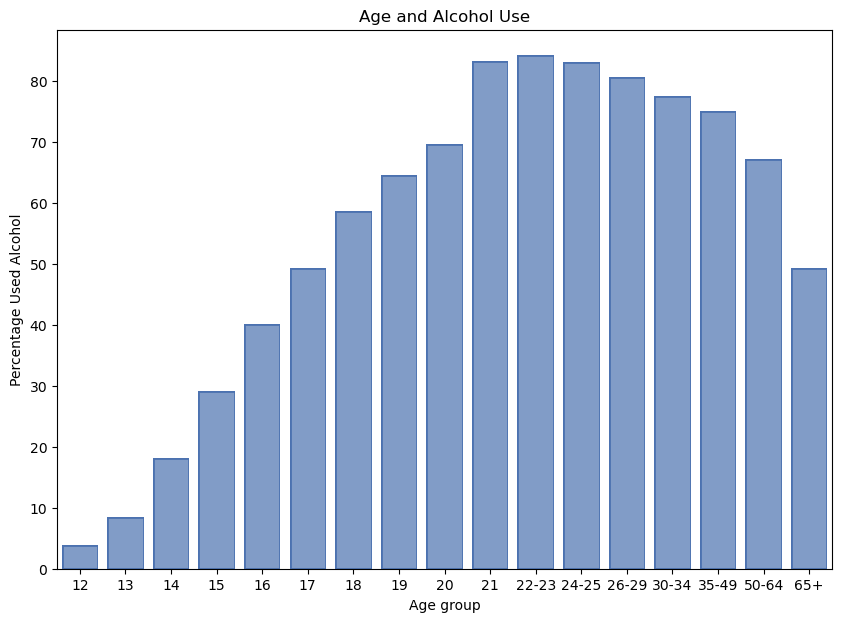

In [ ]:
import seaborn as sns
import seaborn.objects as so
import matplotlib.pyplot as plt

# Filter out FutureWarnings
import warnings

warnings.simplefilter(action="ignore", category=FutureWarning)

fig, ax = plt.subplots(figsize=(10, 7))
p = (
    so.Plot(drug, x="age", y="alcohol_use")
    .add(so.Bar())
    .label(
        x="Age group",
        y="Percentage Used Alcohol",
        title="Age and Alcohol Use",
    )
)
p.on(ax).plot()
plt.show()

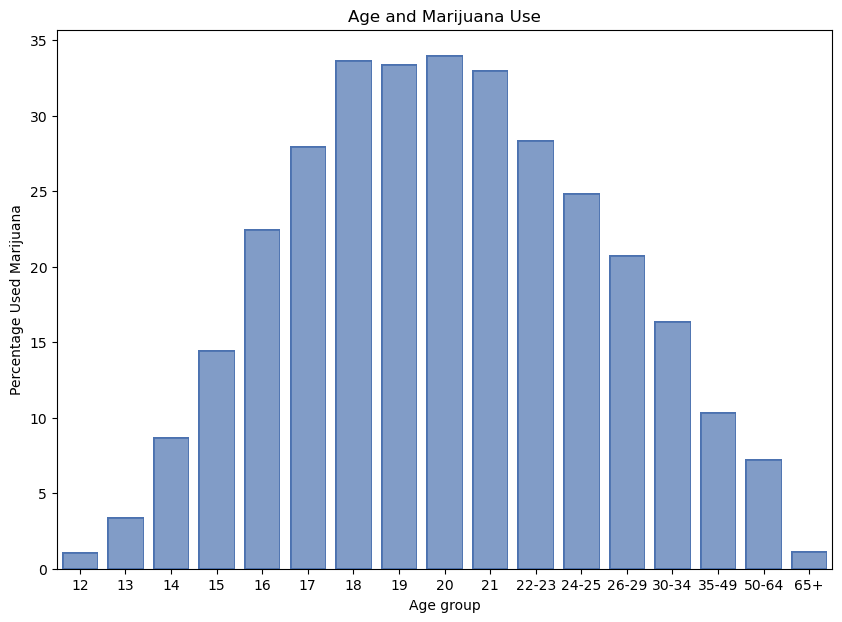

In [ ]:
fig, ax = plt.subplots(figsize=(10, 7))
p = (
    so.Plot(drug, x="age", y="marijuana_use")
    .add(so.Bar())
    .label(
        x="Age group",
        y="Percentage Used Marijuana",
        title="Age and Marijuana Use",
    )
)
p.on(ax).plot()
plt.show()

Filter dataset for age under 18

In [ ]:
filtered_df = drug[
    (drug["age"] == "12")
    | (drug["age"] == "13")
    | (drug["age"] == "14")
    | (drug["age"] == "15")
    | (drug["age"] == "16")
    | (drug["age"] == "17")
    | (drug["age"] == "18")
]

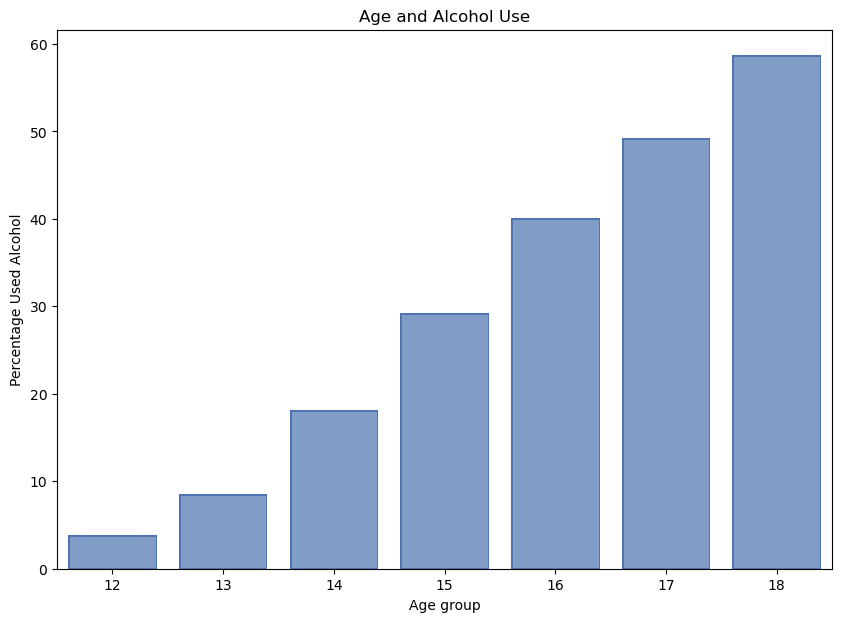

In [ ]:
fig, ax = plt.subplots(figsize=(10, 7))
p = (
    so.Plot(filtered_df, x="age", y="alcohol_use")
    .add(so.Bar())
    .label(
        x="Age group",
        y="Percentage Used Alcohol",
        title="Age and Alcohol Use",
    )
)
p.on(ax).plot()
plt.show()

Sort dataset by alcohol use

In [ ]:
sorted_drug_use = drug.sort_values(by="alcohol_use", ascending=False)
sorted_drug_use.head(10)

,age,n,alcohol_use,alcohol_frequency,marijuana_use,marijuana_frequency,cocaine_use,cocaine_frequency,crack_use,crack_frequency,...,oxycontin_use,oxycontin_frequency,tranquilizer_use,tranquilizer_frequency,stimulant_use,stimulant_frequency,meth_use,meth_frequency,sedative_use,sedative_frequency
10,22-23,4707,84.2,52.0,28.4,52.0,4.5,5.0,0.5,5.0,...,1.7,17.5,4.4,12.0,3.6,10.0,0.6,46.0,0.2,52.0
9,21,2354,83.2,52.0,33.0,52.0,4.8,5.0,0.5,17.0,...,1.3,13.5,3.9,7.0,4.1,10.0,0.6,2.0,0.3,9.0
11,24-25,4591,83.1,52.0,24.9,60.0,4.0,6.0,0.5,6.0,...,1.3,20.0,4.3,10.0,2.6,10.0,0.7,21.0,0.2,17.5
12,26-29,2628,80.7,52.0,20.8,52.0,3.2,5.0,0.4,6.0,...,1.2,13.5,4.2,10.0,2.3,7.0,0.6,30.0,0.4,4.0
13,30-34,2864,77.5,52.0,16.4,72.0,2.1,8.0,0.5,15.0,...,0.9,46.0,3.6,8.0,1.4,12.0,0.4,54.0,0.4,10.0
14,35-49,7391,75.0,52.0,10.4,48.0,1.5,15.0,0.5,48.0,...,0.3,12.0,1.9,6.0,0.6,24.0,0.2,104.0,0.3,10.0
8,20,2271,69.7,48.0,34.0,60.0,4.9,8.0,0.6,5.0,...,1.7,12.0,5.4,10.0,4.0,12.0,0.9,12.0,0.5,4.0
15,50-64,3923,67.2,52.0,7.3,52.0,0.9,36.0,0.4,62.0,...,0.4,5.0,1.4,10.0,0.3,24.0,0.2,30.0,0.2,104.0
7,19,2223,64.6,36.0,33.4,60.0,4.1,5.5,0.5,2.0,...,1.5,7.5,4.2,4.5,3.3,6.0,0.4,105.0,0.3,6.0
6,18,2469,58.7,24.0,33.7,52.0,3.2,5.0,0.4,10.0,...,1.7,7.0,4.9,12.0,3.0,8.0,0.5,12.0,0.4,10.0
